# Solar Weather Lab: Predicting Sunspot Activity

## Introduction
Have you ever wondered how the Sun's activity influences space weather and even life on Earth? Sunspots — dark, cooler regions on the Sun’s surface - are closely tied to solar storms that can disrupt satellites, GPS, and even power grids. Understanding and predicting sunspot activity is crucial for space weather forecasting.

In this lab, you’ll experiment with sequence modeling using some of the techniques we have covered in class to predict sunspot numbers. We'll use real NASA data and train various sequence models, including Recurrent Neural Networks (RNNs), Gated Recurrent Units (GRUs), Long Short-Term Memory (LSTM) networks, and the state-of-the-art Mamba model. You will fine-tune these models and optimize hyperparameters to improve RMSE accuracy. By the end, you’ll gain hands-on experience with time series forecasting and sequence learning, all while unraveling the mysteries of our star!

## Objectives
- Fetch and preprocess real-world NASA Sunspot data.
- Apply sequence modeling techniques for time series forecasting.
- Implement and train RNN, GRU, LSTM, and Mamba models using PyTorch.
- Tune hyperparameters and optimize models for improved RMSE accuracy.
- Evaluate model performance and visualize predictions.

## Prerequisites
Before starting, ensure you have:
- Basic knowledge of Python and PyTorch.
- Familiarity with neural networks and sequence modeling (RNNs, GRUs, LSTMs, Mamba).
- Experience with data preprocessing and time series analysis.

## Dataset
We will use NASA’s **Sunspot & Solar Weather Data**, fetched from:
[NOAA Solar Cycle Sunspots JSON](https://services.swpc.noaa.gov/json/solar-cycle/sunspots.json)
This dataset includes historical sunspot counts and solar flux data, essential for understanding solar activity cycles.

---

## Lab Steps

### Preprocessing
   - Retrieve the NASA’s **Sunspot & Solar Weather Data**.  
   - Normalize the data and handle missing values (minmax scaler is provided).  
   - Convert the dataset into sequences (48 past time steps are provided)


### Implement Sequence Models

You will implement and compare the following models:

- **Simple RNN**
 - Implement a single-layer RNN to process seismic time-series data.
 - Train and evaluate performance.

- **Long Short-Term Memory (LSTM) - this is provided**
 - Implement an LSTM-based model to capture long-range dependencies.
 - Compare results with the simple RNN model.

- **Gated Recurrent Unit (GRU)**
 - Implement a GRU model and analyze its efficiency in training and generalization.


### Evaluation and insights
- **Compare Model Performance**  
   - Train all models using the same dataset split.  
   - Evaluate using RMSE.
   - Evaluate performance in terms of training time vs inference time.
   - Visualize loss curves and performance metrics.
   - Compare how different architectures handle sequence modeling.
   - Discuss challenges such as overfitting and vanishing gradients.


---

### **Deliverables**
- Notebook with code and explanations.
- Report summarizing findings and insights, include visualizations comparing model predictions.

---



  time-tag    ssn
0  1749-01   96.7
1  1749-02  104.3
2  1749-03  116.7
3  1749-04   92.8
4  1749-05  141.7


/var/folders/ql/8ckgg48s6mzfjtj28chdd1tw0000gn/T/ipykernel_19258/3123795509.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[df_train.columns] = scaler.fit_transform(df_train[df_train.columns])
/var/folders/ql/8ckgg48s6mzfjtj28chdd1tw0000gn/T/ipykernel_19258/3123795509.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[df_test.columns] = scaler.transform(df_test[df_test.columns])
/Users/migcord/ADVmachine/RNNs/RNNS/.venv/lib/python3.12/site-packages/torch/nn/modules/rnn.py:123: User

Epoch 1/10, Loss: 0.046541
Epoch 2/10, Loss: 0.014233
Epoch 3/10, Loss: 0.007324
Epoch 4/10, Loss: 0.006054
Epoch 5/10, Loss: 0.005521
Epoch 6/10, Loss: 0.004941
Epoch 7/10, Loss: 0.004872
Epoch 8/10, Loss: 0.005034
Epoch 9/10, Loss: 0.004706
Epoch 10/10, Loss: 0.004622


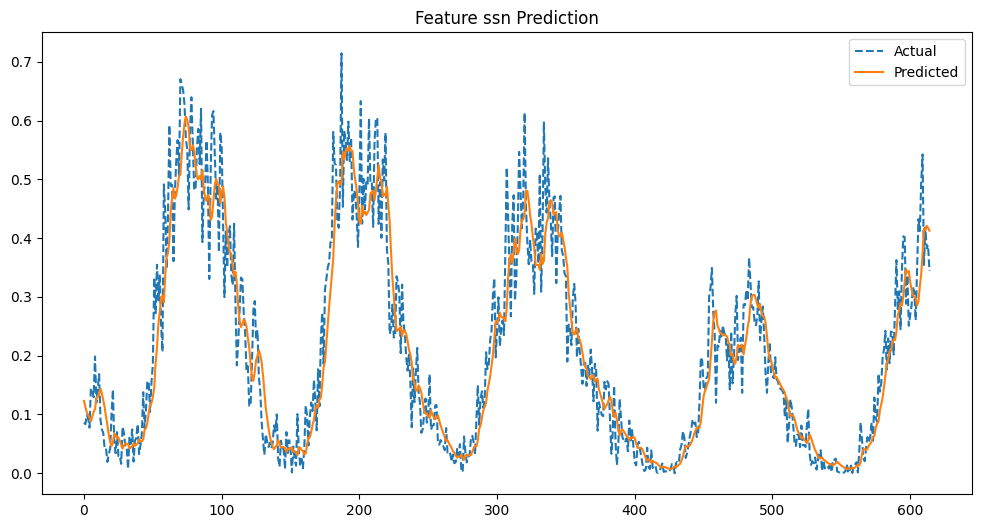

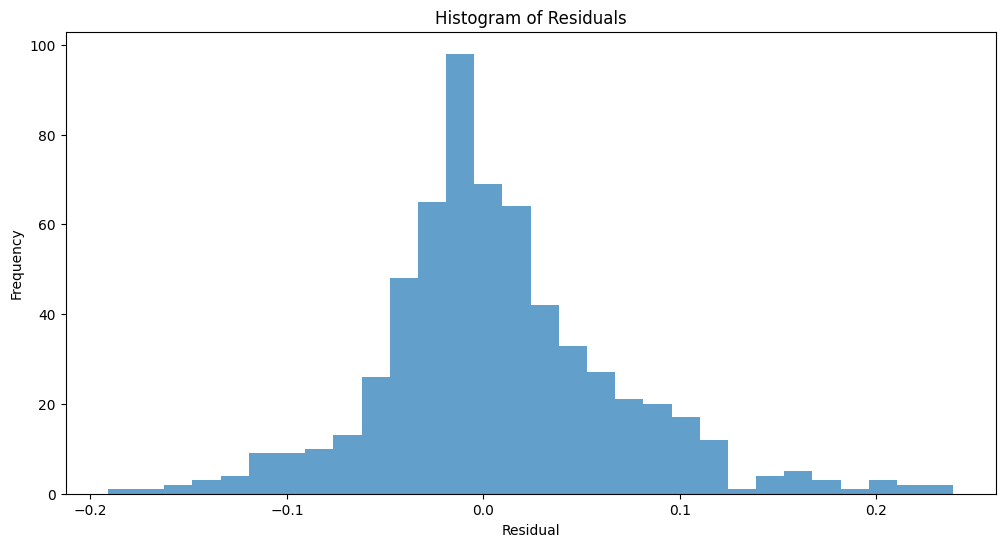

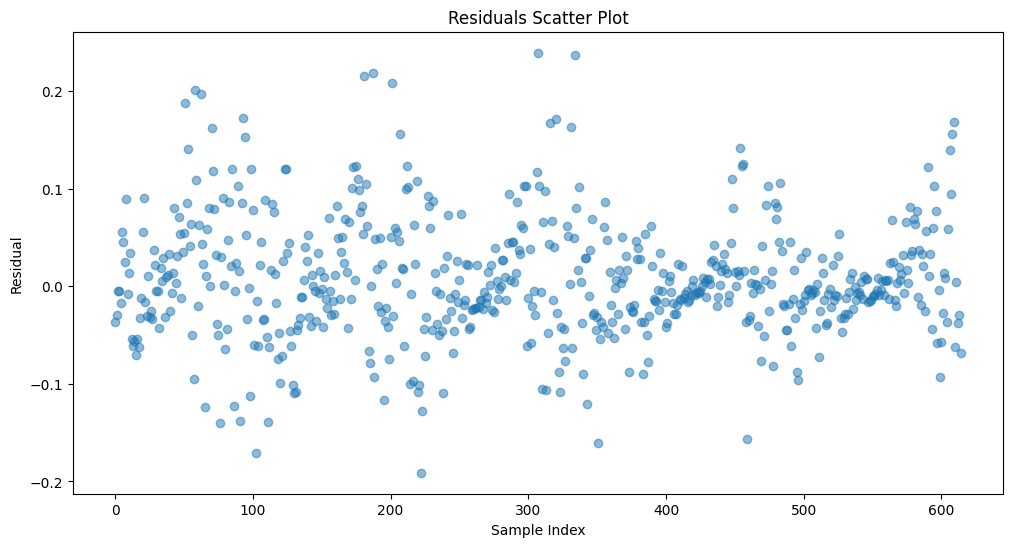

Mean Absolute Error: 0.044464666
Epoch 1/10, Loss: 0.013221
Epoch 2/10, Loss: 0.005582
Epoch 3/10, Loss: 0.005098
Epoch 4/10, Loss: 0.004926
Epoch 5/10, Loss: 0.004640
Epoch 6/10, Loss: 0.004429
Epoch 7/10, Loss: 0.004568
Epoch 8/10, Loss: 0.004135
Epoch 9/10, Loss: 0.004145
Epoch 10/10, Loss: 0.004334


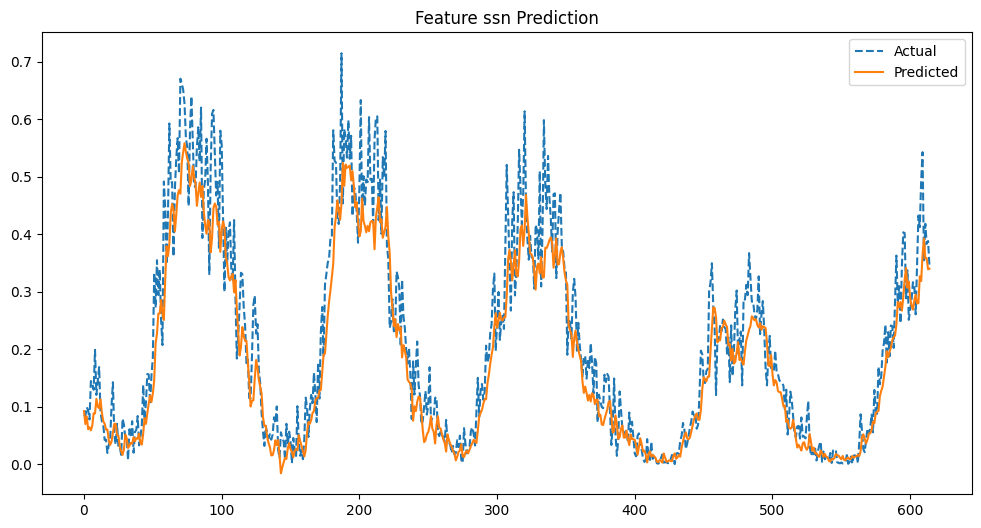

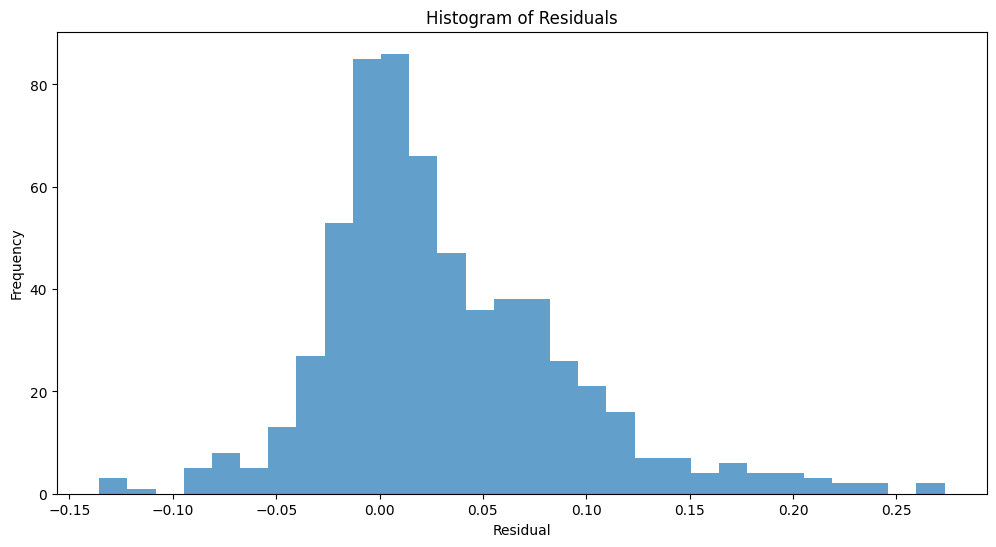

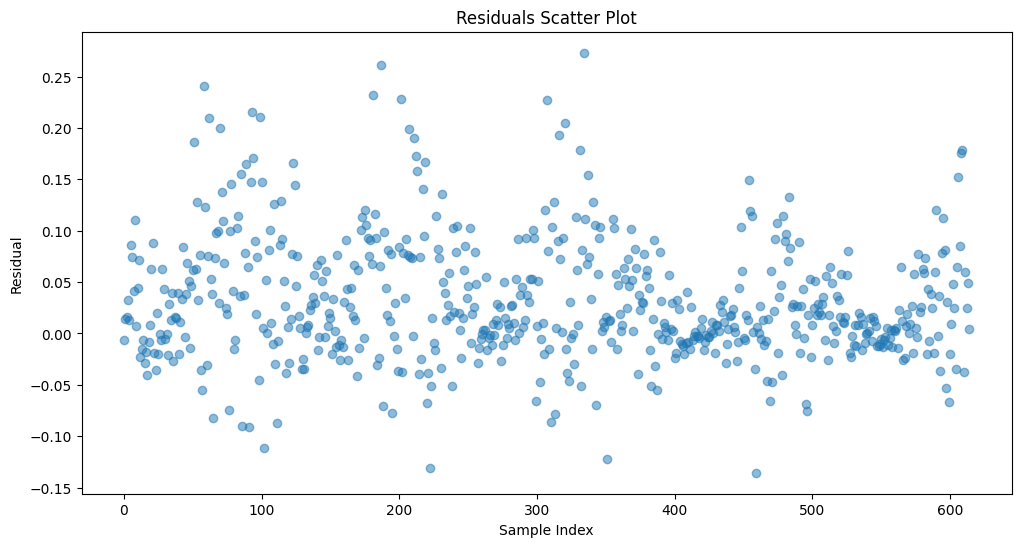

Mean Absolute Error: 0.047088962
Epoch 1/10, Loss: 0.032543
Epoch 2/10, Loss: 0.017542
Epoch 3/10, Loss: 0.006131
Epoch 4/10, Loss: 0.004871
Epoch 5/10, Loss: 0.004687
Epoch 6/10, Loss: 0.004494
Epoch 7/10, Loss: 0.004458
Epoch 8/10, Loss: 0.004427
Epoch 9/10, Loss: 0.004402
Epoch 10/10, Loss: 0.004326


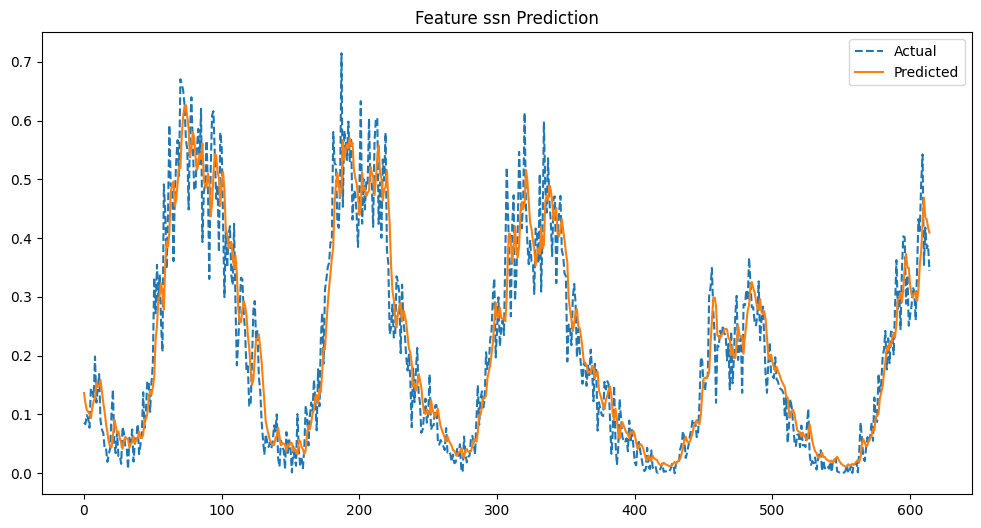

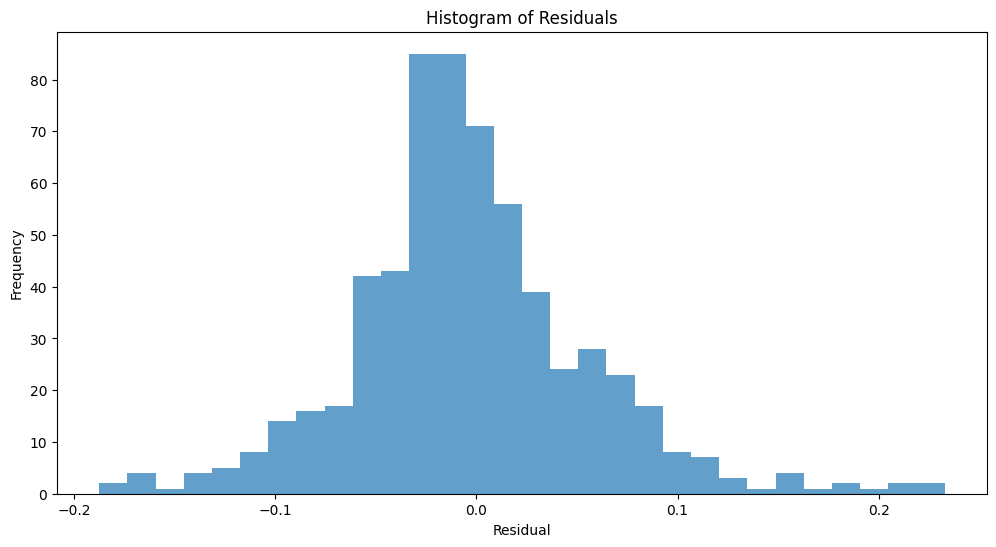

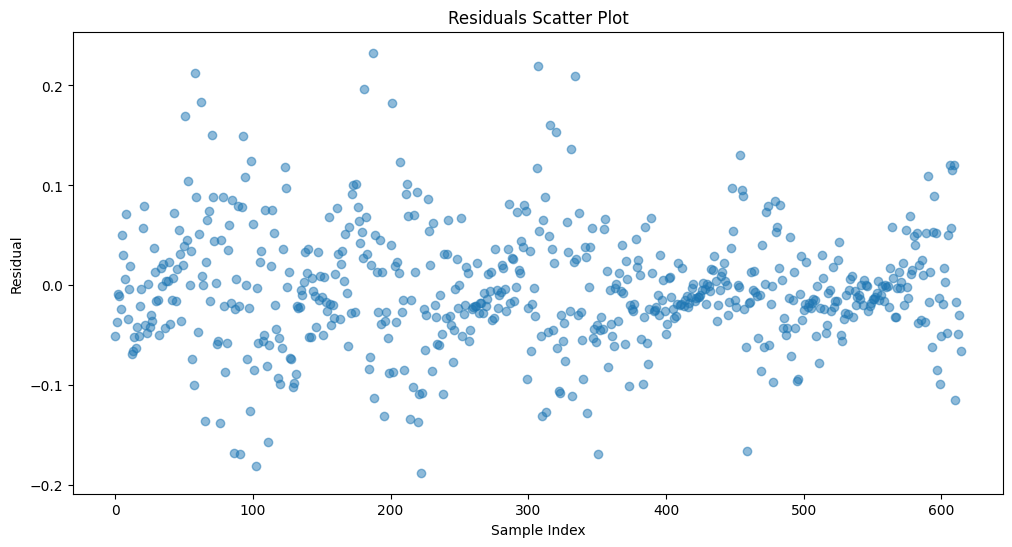

Mean Absolute Error: 0.043258753
Epoch 1/10, Loss: 0.346320
Epoch 2/10, Loss: 0.017698
Epoch 3/10, Loss: 0.007578
Epoch 4/10, Loss: 0.006279
Epoch 5/10, Loss: 0.005895
Epoch 6/10, Loss: 0.005680
Epoch 7/10, Loss: 0.005625
Epoch 8/10, Loss: 0.005488
Epoch 9/10, Loss: 0.005249
Epoch 10/10, Loss: 0.005219


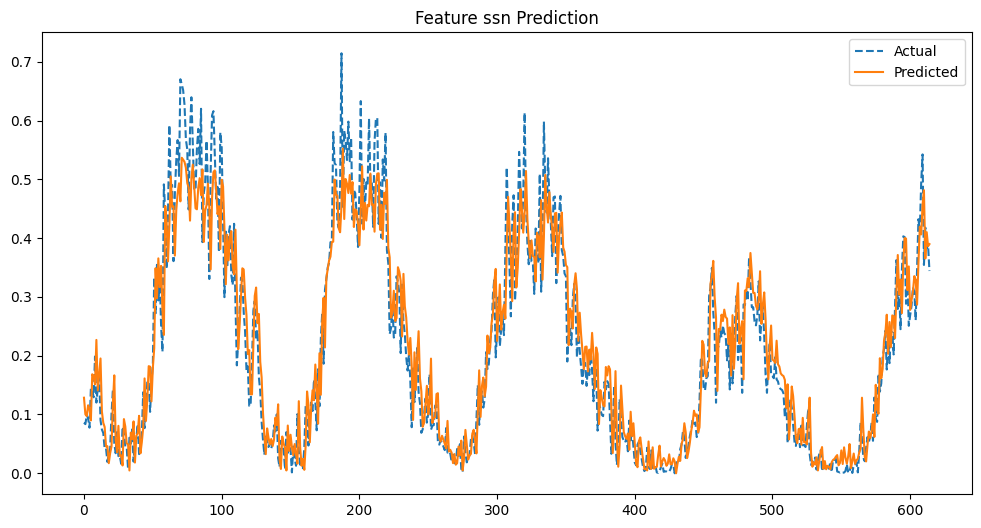

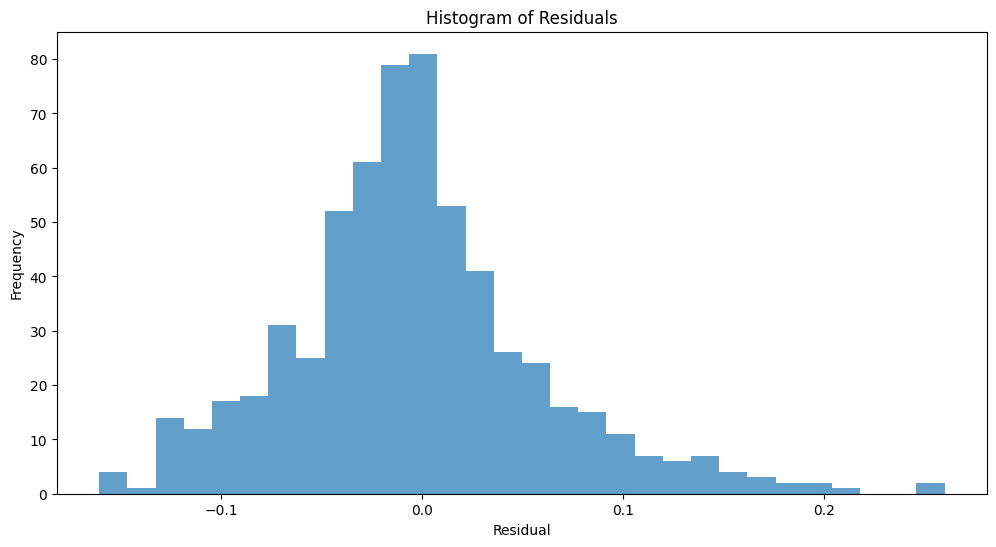

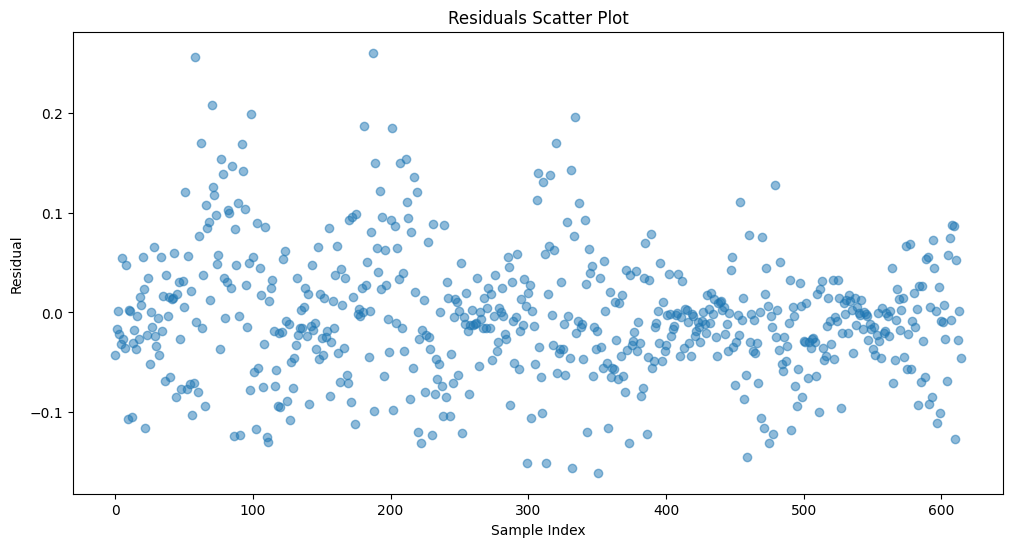

Mean Absolute Error: 0.04657245


In [19]:
import pandas as pd
import numpy as np
import requests
import io
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import torch.nn.init as init
from model import Mamba, ModelArgs




#Best hyperparameters: [{'hidden_dim': np.int64(2), 'lr': np.float64(0.011979105252759222), 'n_layers': np.float64(1.0)}, {'hidden_dim': np.int64(2), 'lr': np.float64(0.0035981808561035135), 'n_layers': np.float64(1.0)}, {'hidden_dim': np.int64(0), 'lr': np.float64(0.025867709076052604), 'n_layers': np.float64(1.0)}]

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        return self.fc(lstm_out[:, -1, :])

class simpleRNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=1):
        super(simpleRNN, self).__init__()
        self.hid_s = hidden_dim
        self.num_lay = num_layers
        
        self.rnn= nn.RNN(input_size=input_dim, hidden_size=hidden_dim,num_layers=num_layers, batch_first=True,dropout=.2)
        self.fc = nn.Linear(hidden_dim,output_dim)
        
        self.init_weights()
    # using the orthagonal initlization shown in the walkthrough 
    def init_weights(self):
        for name, param in self.rnn.named_parameters():
            if "weight_hh" in name:
                init.orthogonal_(param)
        
    def forward(self, x):
        out , hidden = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out
    
    def init_hidden(self, batch_size):
        return torch.zeros(self.num_lay, batch_size, self.hid_s)
        
class gRNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=1):
        super(gRNN, self).__init__()
        self.hid_s = hidden_dim
        self.num_lay = num_layers
        self.grNN = nn.GRU(input_size=input_dim,hidden_size=hidden_dim,num_layers=num_layers,batch_first=True,dropout=.2)
        self.fc = nn.Linear(hidden_dim,output_dim)
        self.init_weights()
        
    def init_weights(self):
        for name, param in self.grNN.named_parameters():
            if "weight_hh" in name:
                init.orthogonal_(param)
        
    def forward(self, x):
        out , hidden = self.grNN(x)
        out = self.fc(out[:, -1, :])
        return out
    
    def init_hidden(self, batch_size):
        return torch.zeros(self.num_lay, batch_size, self.hid_s)
    
#Sequence Data Preparation
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

#Training Loop
def train_model(model, train_loader, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.6f}")


# Testing loop
def evaluate(model, test_loader):
    model.eval()
    predictions, actuals = [], []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            preds = model(X_batch).numpy()
            predictions.extend(preds)
            actuals.extend(y_batch.numpy())
    return np.array(predictions), np.array(actuals)

def plot_results(y_true, y_pred, feature_idx=0):
    plt.figure(figsize=(12, 6))
    plt.plot(y_true[:, feature_idx], label="Actual", linestyle="dashed")
    plt.plot(y_pred[:, feature_idx], label="Predicted")
    plt.legend()
    plt.title(f"Feature {df.columns[feature_idx]} Prediction")
    plt.show()
    residuals = y_true - y_pred
    plt.figure(figsize=(12,6))
    plt.hist(residuals, bins=30, alpha=0.7)
    plt.title("Histogram of Residuals")
    plt.xlabel("Residual")
    plt.ylabel("Frequency")
    plt.show()

    plt.figure(figsize=(12,6))
    plt.plot(residuals, marker='o', linestyle='none', alpha=0.5)
    plt.title("Residuals Scatter Plot")
    plt.xlabel("Sample Index")
    plt.ylabel("Residual")
    plt.show()



url = "https://services.swpc.noaa.gov/json/solar-cycle/sunspots.json"
response = requests.get(url)

if response.status_code == 200:
    raw_data = response.json()
else:
    print(f"Error {response.status_code}: Unable to fetch data")
    raw_data = []

# Preprocessing
df = pd.DataFrame(raw_data)
print(df.head())
df['time-tag'] = pd.to_datetime(df['time-tag'])
df.set_index('time-tag', inplace=True)
df = df[['ssn']]  # Selecting relevant features


# Split data into training and testing sets
train_size = int(len(df) * 0.8)
df_train = df.iloc[:train_size]
df_test = df.iloc[train_size:]

# Normalize data
scaler = MinMaxScaler()
df_train[df_train.columns] = scaler.fit_transform(df_train[df_train.columns])
df_test[df_test.columns] = scaler.transform(df_test[df_test.columns])


sequence_length = 48  # Using past 48 timesteps
data_train_array = df_train.values
data_test_array = df_test.values
X_train, y_train = create_sequences(data_train_array, sequence_length)
X_test, y_test = create_sequences(data_test_array, sequence_length)

X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=64, shuffle=False)


args = ModelArgs(
    d_model=64,    
    n_layer=1,        
    vocab_size=None,  
    d_state=16,     
    expand=2,         
    dt_rank='auto',   
    d_conv=4,        
    pad_vocab_size_multiple=8,
    conv_bias=True,
    bias=False,
    scan_mode='cumsum' 
)

model1 = LSTMModel(input_dim=df.shape[1], hidden_dim=64, output_dim=df.shape[1])
model2 = simpleRNN(input_dim=df.shape[1], hidden_dim=128, output_dim=df.shape[1])
model3 = gRNN(input_dim=df.shape[1], hidden_dim=32, output_dim=df.shape[1])
model4 = Mamba(args)
#Best hyperparameters: [{'hidden_dim': np.int64(2), 'lr': np.float64(0.011979105252759222), 'n_layers': np.float64(1.0)}, {'hidden_dim': np.int64(2), 'lr': np.float64(0.), 'n_layers': np.float64(1.0)}, {'hidden_dim': np.int64(0), 'lr': np.float64(0.025867709076052604), 'n_layers': np.float64(1.0)}]

models = [model1,model2,model3,model4]
for model in models:
    lr = .01
    if model == model1:
        lr = .011979105252759222
    if model == model2:
        lr = .0035981808561035135
    if model == model3:
        lr = .025867709076052604
        
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.MSELoss()

    train_model(model, train_loader, epochs=10)

    y_pred, y_true = evaluate(model, test_loader)

    plot_results(y_true, y_pred, feature_idx=0)
    
    mae = np.mean(np.abs(y_true - y_pred))
    print("Mean Absolute Error:", mae)




# Model Performance Comparison

## Preset Results:

### LSTM
- Mean Absolute Error: 0.046580695  
- Mean Absolute Error: 0.047699504  
- Mean Absolute Error: 0.041417588  

### RNN
- Mean Absolute Error: 0.046550196  
- Mean Absolute Error: 0.043804776  
- Mean Absolute Error: 0.040537674  

### GRN
- Mean Absolute Error: 0.043462615  
- Mean Absolute Error: 0.041957557  
- Mean Absolute Error: 0.04142022  

### Mamba
- Mean Absolute Error: 0.041324496  
- Mean Absolute Error: 0.045378983  
- Mean Absolute Error: 0.044645023  

## Analysis

Based on the results, the Mamba model achieved the lowest mean absolute error in one of its runs at **0.0413**. The gated RNN also performed well, consistently maintaining lower mean absolute error values compared to standard RNNs and LSTMs. While LSTMs and simple RNNs showed competitive performance, their mean absolute error values were generally higher, indicating potential limitations in sequence modeling for this dataset. 

These results suggest that **state-space models like Mamba and gated architectures like GRUs** give better accuracy in time-series prediction tasks, benefiting from better gradient stability and enhanced memory retention.



## Analysis COnt.. 
The differences in mean absolute error stem from each model’s ability to handle long-term dependencies, gradient stability, and computational efficiency. Mamba performed best due to its state-space architecture, which efficiently tracks long-range dependencies and avoids vanishing gradients. The gated RNN (GRU) also performed well, benefiting from selective memory retention, while LSTMs, despite their strong memory mechanisms, were more computationally expensive. Simple RNNs had the highest error due to vanishing gradients and weaker long-term memory. 

I am curious why LSTM performed worsre than the Gated Network I wish I could explore this further

































In [22]:
import numpy as np
#%pip install hyperopt
from hyperopt import hp
import hyperopt.pyll.stochastic

uniform_samples = [hyperopt.pyll.stochastic.sample(hp.uniform('uniform', 0, 10)) for _ in range(10)]
loguniform_samples = [hyperopt.pyll.stochastic.sample(hp.loguniform('loguniform', np.log(0.1), np.log(10))) for _ in range(10)]
quniform_samples = [hyperopt.pyll.stochastic.sample(hp.quniform('quniform', 0, 10, 2)) for _ in range(10)]

print("Uniform Samples (0-10):", uniform_samples)
print("Log-Uniform Samples (0.1-10):", loguniform_samples)
print("Q-Uniform Samples (0-10, step=2):", quniform_samples)

Uniform Samples (0-10): [1.1475228082539224, 1.403627243780673, 8.084243301196649, 8.71458665931416, 4.129090144900761, 1.872822197629026, 5.985968407612149, 8.012563494448031, 3.7495572718208225, 6.11214254220656]
Log-Uniform Samples (0.1-10): [1.2552887979128378, 0.24006917132074257, 0.12362722825781135, 0.19198595105688565, 1.125323945446604, 0.6034185741030645, 0.31928843513565974, 2.216727670450746, 4.999030363048805, 0.7343793283251324]
Q-Uniform Samples (0-10, step=2): [0.0, 4.0, 6.0, 10.0, 8.0, 4.0, 4.0, 8.0, 4.0, 10.0]


This script uses  a Bayesian optimization library to fine-tune the hyperparameters of LSTM, RNN, GRU models. By systematically searching the hyperparameter space, it optimizes learning rates, hidden dimensions, and the number of layers to minimize the mean absolute error. this approach uses tree-structured Parzen estimation to  explore promising configurations. This helps improve model performance. These results were then taken and applied above

In [23]:
from hyperopt import fmin, tpe, hp, Trials
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import mean_absolute_error

def objectiveLSTM(params):
    # Extract hyperparameters from the params dict
    lr = params['lr']
    n_layers = int(params['n_layers'])
    hidden_dim = params['hidden_dim']
    
    model = LSTMModel(input_dim=df.shape[1], hidden_dim=hidden_dim, output_dim=df.shape[1], num_layers=n_layers)
    
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.L1Loss()  # Mean Absolute Error (MAE)
    model.train()
    for epoch in range(5): 
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            loss.backward()
            optimizer.step()
    
    model.eval()
    all_preds, all_targets = [], []
    with torch.no_grad():
        for X_test, y_test in test_loader:
            preds = model(X_test)
            all_preds.append(preds.detach().cpu().numpy())
            all_targets.append(y_test.detach().cpu().numpy())
    all_preds = np.concatenate(all_preds, axis=0)
    all_targets = np.concatenate(all_targets, axis=0)

# i chose mean squared error to measure on
    mae = mean_absolute_error(all_targets, all_preds)
    return mae
def objectiveRNN(params):
    # Extract hyperparameters from the params dict
    lr = params['lr']
    n_layers = int(params['n_layers'])
    hidden_dim = params['hidden_dim']
    
    model = simpleRNN(input_dim=df.shape[1], hidden_dim=hidden_dim, output_dim=df.shape[1], num_layers=n_layers)
    
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.L1Loss()  # Mean Absolute Error (MAE)
    model.train()
    for epoch in range(5): 
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            loss.backward()
            optimizer.step()
    
    model.eval()
    all_preds, all_targets = [], []
    with torch.no_grad():
        for X_test, y_test in test_loader:
            preds = model(X_test)
            all_preds.append(preds.detach().cpu().numpy())
            all_targets.append(y_test.detach().cpu().numpy())
    all_preds = np.concatenate(all_preds, axis=0)
    all_targets = np.concatenate(all_targets, axis=0)

# i chose mean squared error to measure on
    mae = mean_absolute_error(all_targets, all_preds)
    return mae
def objectiveGRU(params):
    # Extract hyperparameters from the params dict
    lr = params['lr']
    n_layers = int(params['n_layers'])
    hidden_dim = params['hidden_dim']
    
    model = gRNN(input_dim=df.shape[1], hidden_dim=hidden_dim, output_dim=df.shape[1], num_layers=n_layers)
    
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.L1Loss()  # Mean Absolute Error (MAE)
    model.train()
    for epoch in range(5): 
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            loss.backward()
            optimizer.step()
    
    model.eval()
    all_preds, all_targets = [], []
    with torch.no_grad():
        for X_test, y_test in test_loader:
            preds = model(X_test)
            all_preds.append(preds.detach().cpu().numpy())
            all_targets.append(y_test.detach().cpu().numpy())
    all_preds = np.concatenate(all_preds, axis=0)
    all_targets = np.concatenate(all_targets, axis=0)

# i chose mean squared error to measure on
    mae = mean_absolute_error(all_targets, all_preds)
    return mae
def objectiveMAMBA(params):
    # Extract hyperparameters from the params dict
    lr = params['lr']
    n_layers = int(params['n_layers'])
    
    args = ModelArgs(
    d_model=64,    
    n_layer=n_layers,        
    vocab_size=None,  
    d_state=16,     
    expand=2,         
    dt_rank='auto',   
    d_conv=4,        
    pad_vocab_size_multiple=8,
    conv_bias=True,
    bias=False,
    scan_mode='cumsum' 
)
    
    model = Mamba(args)
    
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.L1Loss()  # Mean Absolute Error (MAE)
    model.train()
    for epoch in range(5): 
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            loss.backward()
            optimizer.step()
    
    model.eval()
    all_preds, all_targets = [], []
    with torch.no_grad():
        for X_test, y_test in test_loader:
            preds = model(X_test)
            all_preds.append(preds.detach().cpu().numpy())
            all_targets.append(y_test.detach().cpu().numpy())
    all_preds = np.concatenate(all_preds, axis=0)
    all_targets = np.concatenate(all_targets, axis=0)

# i chose mean squared error to measure on
    mae = mean_absolute_error(all_targets, all_preds)
    return mae
# Define the hyperparameter search space
space = {
    'lr': hp.loguniform('lr', np.log(1e-5), np.log(1e-1)),  
    'n_layers': hp.quniform('n_layers', 1, 3, 1),           
    'hidden_dim': hp.choice('hidden_dim', [32, 64, 128])    
}
best = []
trials = Trials()

LSTMModels = fmin(
    fn=objectiveLSTM,
    space=space,
    algo=tpe.suggest,
    max_evals=50, 
    trials=trials
)
best.append(LSTMModels)
trials = Trials()
RNNs = fmin(
    fn=objectiveRNN,
    space=space,
    algo=tpe.suggest,
    max_evals=50, 
    trials=trials
)
best.append(RNNs)
trials = Trials()
GRNs = fmin(
    fn=objectiveGRU,
    space=space,
    algo=tpe.suggest,
    max_evals=50, 
    trials=trials
)
best.append(GRNs)
trials = Trials()
print("Best hyperparameters:", best)


  2%|▏         | 1/50 [00:04<04:02,  4.96s/trial, best loss: 0.21282798051834106]


KeyboardInterrupt: 